In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initial belief
Let's assume we want to find the position at t=1,

$bel(x0)$ = $p(x_{t-1}) = \begin{bmatrix} 0.333 & 0 & 0.333 & 0 & 0 & 0 & 0 & 0.333 & 0 & 0 \end{bmatrix}$

[0 1 2 3 4 5 6 7 8 9]


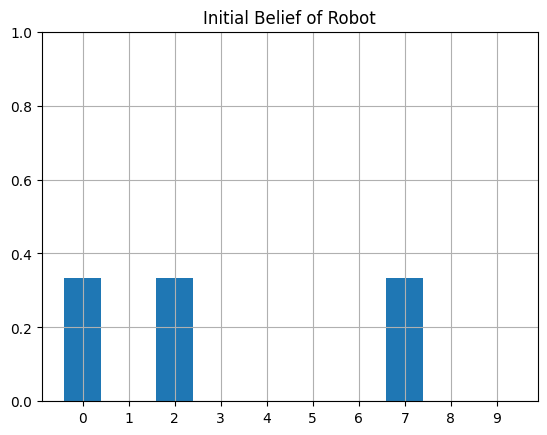

In [2]:
x_t_minus_1 = np.array([0.333, 0, 0.333, 0, 0, 0, 0, 0.333, 0, 0])
x_axis = np.arange(np.size(x_t_minus_1))
print(x_axis)
plt.ylim((0,1))
plt.grid()
plt.title("Initial Belief of Robot")
plt.bar(x_axis, x_t_minus_1)
ax = plt.gca()
ax.set_xticks(x_axis);

<BarContainer object of 10 artists>

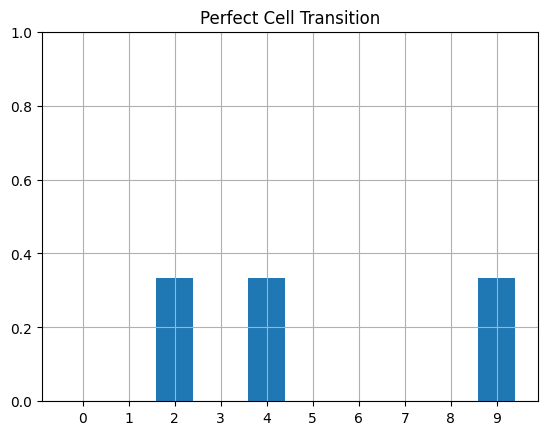

In [3]:
# Cell Transition - Perfect world - Assume Ut = 2
x_t_perfect = np.zeros((10,1))
for i in range(10):
    x_t_perfect[i] = x_t_minus_1[i - 2]

# Plot the Perfect Transition
plt.ylim((0,1))
plt.grid()
plt.title("Perfect Cell Transition")
ax = plt.gca()
ax.set_xticks(x_axis);
plt.bar(x_axis, x_t_perfect[:,0])

# Cell Transition Probability
Let's assume we give control input $u_t = 2$
We want to define $p(x_t|x_{t-1}, u_t)$ a.k.a state transition probability
Specifically, we want it when $u_t = 2$

Let's define the state transition probability as 80% robot succeeds in moving two cells, 10% it overhshoots by one cell and 10% it undershoots by one cell

Also, we assume that the robot wraps to initial position after it crosses the cell number 10. In other words, the hallway is circular

This can be mathematically represented as:

$ p(x_t | x_{t-1}, u_t = 2) = \begin{bmatrix}
x_{t-1}/x_{t} & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 \\
0 & 0 & 0.1 & 0.8 & 0.1 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0.1 & 0.8 & 0.1 & 0 & 0 & 0 & 0 & 0 \\
2 & 0 & 0 & 0 & 0.1 & 0.8 & 0.1 & 0 & 0 & 0 & 0 \\
3 & 0 & 0 & 0 & 0 & 0.1 & 0.8 & 0.1 & 0 & 0 & 0 \\
4 & 0 & 0 & 0 & 0 & 0 & 0.1 & 0.8 & 0.1 & 0 & 0 \\
5 & 0 & 0 & 0 & 0 & 0 & 0 & 0.1 & 0.8 & 0.1 & 0 \\
6 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.1 & 0.8 & 0.1 \\
7 & 0.1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.1 & 0.8 \\
8 & 0.8 & 0.1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0.1 \\
9 & 0.1 & 0.8 & 0.1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}$

This is the conditional distribution of two random variables: $x_t$ and $x_{t-1}$ given the value of random variable $u_t$ = 2

In [4]:
state_transition_prob = np.array([[0, 0.1, 0.8, 0.1, 0, 0, 0, 0, 0, 0],
                                  [0, 0, 0.1, 0.8, 0.1, 0, 0, 0, 0, 0],
                                  [0, 0, 0, 0.1, 0.8, 0.1, 0, 0, 0, 0],
                                  [0, 0, 0, 0, 0.1, 0.8, 0.1, 0, 0, 0],
                                  [0, 0, 0, 0, 0, 0.1, 0.8, 0.1, 0, 0],
                                  [0, 0, 0, 0, 0, 0, 0.1, 0.8, 0.1, 0],
                                  [0, 0, 0, 0, 0, 0, 0, 0.1, 0.8, 0.1],
                                  [0.1, 0, 0, 0, 0, 0, 0, 0, 0.1, 0.8],
                                  [0.8, 0.1, 0, 0, 0, 0, 0, 0, 0, 0.1],
                                  [0.1, 0.8, 0.1, 0, 0, 0, 0, 0, 0, 0]])

# Recover next _prior_ using theorem of total probability
We know that,

$p(x_t, u_t) = \int p(x_t|u_t,x_{t-1})p(x_{t-1})dt$

In Bayesian modelling, 

$p(x_t, u_t)$ = $\bar{bel}(X)$ = prior 

Hence,
$\bar{bel}(X) = \int p(x_t|u_t,x_{t-1})p(x_{t-1})dt$

In [5]:
# Calculate the new belief
# Non-Matrix approach
x_t_slow = np.zeros((10,1))
for i in range(10):
    for j in range(10):
        x_t_slow[i] += state_transition_prob[j,i] * x_t_minus_1[j]

print(x_t_slow)

[[0.0333]
 [0.0333]
 [0.2664]
 [0.0666]
 [0.2664]
 [0.0333]
 [0.    ]
 [0.    ]
 [0.0333]
 [0.2664]]


In [6]:
# Calculate the new belief, leverage matrix multiplication
x_t = np.zeros((10,1))
x_t = np.sum((state_transition_prob.T * x_t_minus_1), axis=1)
print(x_t)

[0.0333 0.0333 0.2664 0.0666 0.2664 0.0333 0.     0.     0.0333 0.2664]


<BarContainer object of 10 artists>

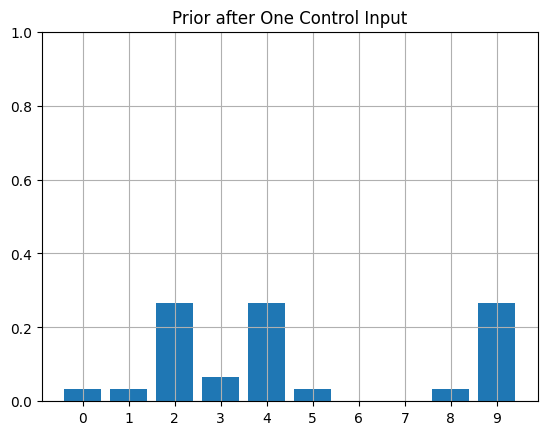

In [7]:
plt.ylim((0,1))
plt.grid()
plt.title("Prior after One Control Input")
ax = plt.gca()
ax.set_xticks(x_axis);
plt.bar(x_axis, x_t)

In [8]:
# No Measurement and continuous prior updates
from ipywidgets import interact, IntSlider

x_axis = np.arange(10)
prior_beliefs = [np.sum((state_transition_prob.T * x_t_minus_1), axis=1)]
x_t = prior_beliefs[0]
for i in range(100):
    x_t = np.sum((state_transition_prob.T * x_t), axis=1)
    prior_beliefs.append(x_t)

print('Prior Belief after 100 iterations: {}'.format(x_t))

def show_prior(step):
    plt.grid()
    plt.ylim((0,1))
    plt.bar(x_axis, prior_beliefs[step-1])
    ax = plt.gca()
    ax.set_xticks(x_axis);
    plt.title(f'Step {step}')
    
interact(show_prior, step=IntSlider(value=1, max=len(prior_beliefs)));

Prior Belief after 100 iterations: [0.10030287 0.10095472 0.10120373 0.10095477 0.1003029  0.09949712
 0.09884523 0.09859625 0.09884527 0.09949715]


interactive(children=(IntSlider(value=1, description='step', max=101), Output()), _dom_classes=('widget-intera…

# Incorporating Measurements
Let's say we have a binary sensor that gives probability that it sees a door when there is actually a door 
with probability of 0.7. Let, 0.1 be the probability for when it still reports seeing a door when there is actually no door

Let, 

$hallway = \begin{bmatrix}
True & False & True & False & False & False & False & True & False & False
\end{bmatrix}$

Where,
_True_ represents the position of door and _False_ represents the walls

So, Mathematically, The _observation likelihood_ can be written as

$P(z_t | x_t)$ : 

$P(Z=door|X=hallway) = 0.7$ 

$P(Z=door|X=\neg hallway) = 0.1$

Similarly,

$P(Z=\neg door|X=hallway) = 0.3$ 

$P(Z=\neg door|X=\neg hallway) = 0.9$

Yes, this observation likelihood representation assumes having prior knowledge of doorway positions in hallway

Recall,

$P(x_t|z_t,u_t) = \eta P(z_t|x_t) \times P(x_t|z_{t-1}, u_{t-1})$

$bel(x_t) = \eta P(z_t|x_t) \times \bar{bel}(x_t)$

<BarContainer object of 10 artists>

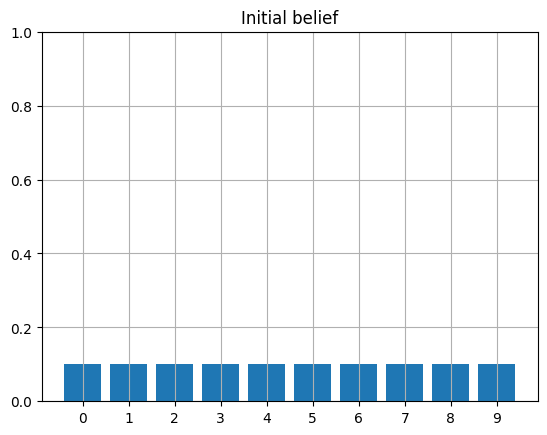

In [9]:
# Uniform initial belief
hallway = np.array([True, False, True, False, False, False, True, False, False, False])
z_true_pos_prob = 0.7
z_false_pos_prob = 0.1

x_t = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
x_0 = x_t
x_axis = np.linspace(0, 10, num=10)
plt.ylim((0,1))
plt.grid()
plt.title("Initial belief")
x_axis = np.arange(10)
ax = plt.gca()
ax.set_xticks(x_axis);
plt.bar(x_axis, x_0)

In [10]:
# Let's assume robot reports seeing a door (correctly) at first position
# Let's do this measurement update at t=0 before incorporating the motion model

# Calculate normalization constant
eta_inv = 0
for i in range(np.size(x_t)):
    if hallway[i] == True:
        eta_inv = eta_inv + z_true_pos_prob * x_t[i]
    else:
        eta_inv = eta_inv + z_false_pos_prob * x_t[i]  

# Calculate the entire posterior distribution
eta = 1 / eta_inv
for i in range(np.size(x_t)):
    if hallway[i] == True:
        x_t[i] = eta * z_true_pos_prob * x_t[i]
    else:
        x_t[i] = eta * z_false_pos_prob * x_t[i]
        

print(f'The normalization constant is: {1 / eta_inv}')
print(f'Verify if it is a proper distribution with sum: {np.sum(x_t)}')

The normalization constant is: 3.571428571428571
Verify if it is a proper distribution with sum: 1.0


<BarContainer object of 10 artists>

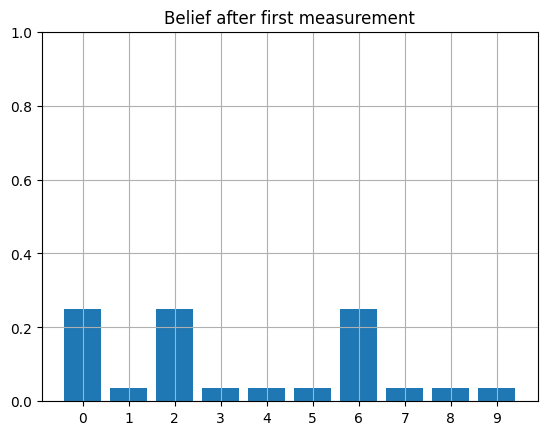

In [11]:
# Plot updated belief after first measurement
x_0 = x_t
x_axis = np.arange(np.size(x_0))
plt.ylim((0,1))
plt.grid()
plt.title("Belief after first measurement")
ax = plt.gca()
ax.set_xticks(x_axis);
plt.bar(x_axis, x_0)

In [12]:
# Let's do it more efficiently
z_true_pos_prob = 0.7
z_false_pos_prob = 0.1
x_t = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

# Use a scaling factor defined by odds
odds = z_true_pos_prob / z_false_pos_prob

# Measurement update - un-normalized
x_t[hallway==True] *= odds

# Normalize to make it a distribution
x_t = x_t / np.sum(x_t)

print(f'Verify if it is a proper distribution with sum: {np.sum(x_t)}')

Verify if it is a proper distribution with sum: 1.0


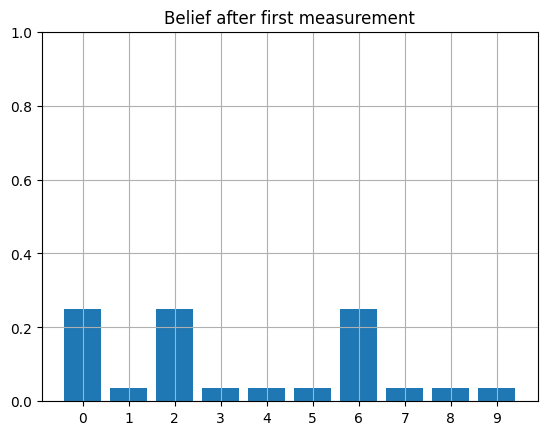

In [13]:
# Plot updated belief after first measurement
x_0 = x_t
plt.ylim((0,1))
plt.grid()
plt.title("Belief after first measurement")
plt.bar(x_axis, x_0)
ax = plt.gca()
ax.set_xticks(x_axis);

In [14]:
# Get everything together and run for few iterations using Bayes filter algorithm
from ipywidgets import interact, IntSlider

# Sim Params
iter = 20
x_axis = np.arange(10)

hallway = np.array([True, False, True, False, False, False, True, False, False, False])
z_true_pos_prob = 0.7
z_false_pos_prob = 0.1
odds = z_true_pos_prob / z_false_pos_prob

x_0 = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
x_t = x_0
x_t[hallway==True] *= odds
x_t = x_t / np.sum(x_t)

# Measurement update location
meas_upd_loc = [0, 2, 6]

beliefs = [x_t]
total_steps = iter+1
for i in range(1,total_steps):
    # State Transition
    x_t = np.sum((state_transition_prob.T * x_t), axis=1)
    # Measurement update
    if (i * 2) % np.size(x_t) in meas_upd_loc:
        x_t[hallway==True] *= odds
        x_t = x_t / np.sum(x_t)
    
    beliefs.append(x_t)
    

print('Belief after {} time steps: {}'.format(total_steps - 1, x_t))
print('Robot after {} time steps is at pos: {}'.format(total_steps - 1, np.argmax(x_t)))

def show_prior(step):
    plt.grid()
    plt.ylim((0,1))
    plt.bar(x_axis, beliefs[step])
    plt.title(f'Time Step {step}')
    
interact(show_prior, step=IntSlider(value=0, max=len(beliefs)-1));

Belief after 20 time steps: [8.98772395e-01 3.55110319e-02 2.47442730e-02 2.61026508e-04
 1.73858031e-04 7.80573915e-05 1.02256669e-03 2.82707441e-04
 3.61377808e-03 3.55403058e-02]
Robot after 20 time steps is at pos: 0


interactive(children=(IntSlider(value=0, description='step', max=20), Output()), _dom_classes=('widget-interac…

In [15]:
np.size(x_t)

10